## Necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [3]:
df.head(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df.head(3)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341


In [5]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

## Question 1

In [6]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [7]:
missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_cols)


Columns with missing values: ['num_cylinders', 'horsepower', 'acceleration', 'num_doors']


## Question 2

In [8]:
median_hp = df["horsepower"].median()

print("Median horsepower:", median_hp)
print("Solution to Question 2:", median_hp)

Median horsepower: 149.0
Solution to Question 2: 149.0


## Preparing the dataset

In [9]:
df_task = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df_task

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [10]:
# Seeting seed to 42 to make results reproducible
np.random.seed(42)

# Setting n equal to the size of the dataset
n = len(df_task)

# Setting boundaries for each dataset in the framework
n_val = int(0.2 * n)
n_test = int(0.2 * n )
n_train = n - (n_val + n_test)

# Shuffle
idx = np.arange(n)
np.random.shuffle(idx)

# Splitting the dataset
df_shuffled = df_task.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [11]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# Remove the column to predict to avoid accidental usage
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [12]:
# Filling NA values with 0s
df_train_0 = df_train.fillna(0)
df_val_0 = df_val.fillna(0)
df_test_0 = df_test.fillna(0)

## Question 3

In [13]:
# Filling NA with mean
# 1 Find the mean
mean = df_train.horsepower.mean()
mean

np.float64(149.54476367006487)

In [14]:
# 2 Fill in the missing values with the mean
df_train_m = df_train.fillna(mean)
df_val_m = df_val.fillna(mean)
df_test_m = df_test.fillna(mean)

In [15]:
# Linear regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [16]:
# Baseline solution
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

# Prepare function
def prepare_X(df):
    df_num = df[base]
    X = df_num.values
    return X

# RMSE function
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

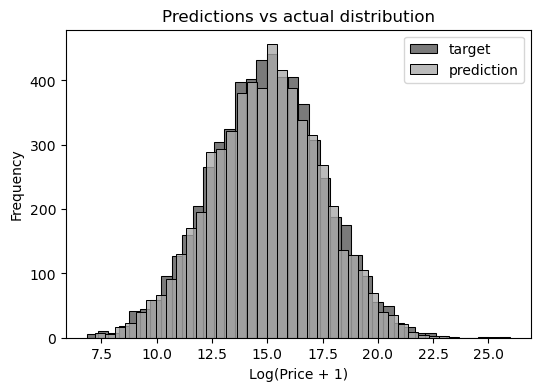

In [17]:
# Checking the first dataset
X_train = prepare_X(df_train_0)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [18]:
# RMSE for the first train dataset
score = rmse(y_train, y_pred)
round(score, 2)

np.float64(0.52)

In [19]:
# Option 1 RMSE
X_val = prepare_X(df_val_0)
y_pred = w_0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

np.float64(0.52)

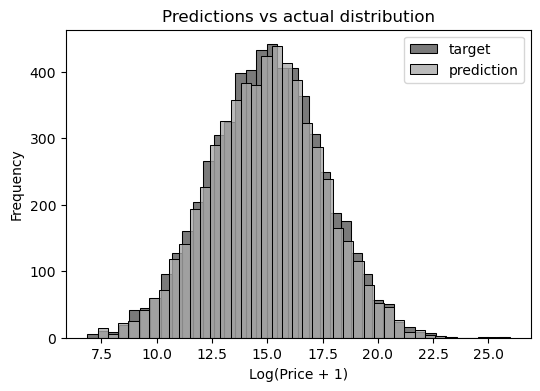

In [20]:
# Checking the second dataset
X_train = prepare_X(df_train_m)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [21]:
# RMSE for the seond train dataset
score = rmse(y_train, y_pred)
round(score, 2)

np.float64(0.46)

In [22]:
# Option 2 RMSE
X_val = prepare_X(df_val_m)
y_pred = w_0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

np.float64(0.46)

## Question 4

In [23]:
# Regression function
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Use the dataset with zeroes
X_train = prepare_X(df_train_0)
X_val = prepare_X(df_val_0)

In [24]:
# For each r in the set do
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    # Train the model
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred), 2))

     0 0.52
  0.01 0.52
   0.1 0.52
     1 0.52
     5 0.52
    10 0.52
   100 0.52


## Question 5

In [25]:
# Define an empty array for RMSE scores
count = 10
rmse_values = np.empty(count)

# Try values from 0 to 9 for seed
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    # For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    # Use the chosen seed value
    np.random.seed(seed)
    n = len(df_task)

    # Setting boundaries for each dataset in the framework
    n_val = int(0.2 * n)
    n_test = int(0.2 * n )
    n_train = n - (n_val + n_test)
    
    # Shuffle
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # Splitting the dataset
    df_shuffled = df_task.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    # Remove the column to predict to avoid accidental usage
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

 
    # Fill the missing values with 0 and train a model without regularization.
    df_train = df_train.fillna(0)
    df_test = df_test.fillna(0)
    df_val = df_val.fillna(0)

    # Train the model
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)


    # For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    value = rmse(y_val, y_pred)

    # Appending the array
    rmse_values[seed] = value


# What's the standard deviation of all the scores?
std = np.std(rmse_values)


# Round the result to 3 decimal digits (round(std, 3))
print(std)
print("Solution to Question 5 is ", round(std, 3))

0.006989446427001858
Solution to Question 5 is  0.007


## Question 6

In [26]:
# Split the dataset like previously, use seed 9.
np.random.seed(9)
n = len(df_task)

# Setting boundaries for each dataset in the framework
n_val = int(0.2 * n)
n_test = int(0.2 * n )
n_train = n - (n_val + n_test)

# Shuffle
idx = np.arange(n)
np.random.shuffle(idx)

# Splitting the dataset
df_shuffled = df_task.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


# Combine train and validation datasets.

df_combined = pd.concat([df_train, df_val], ignore_index=True)

y_combined = df_combined.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# Remove the column to predict to avoid accidental usage
del df_combined['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


# Fill the missing values with 0 and train a model with r=0.001.

# Missing values
df_combined = df_combined.fillna(0)
df_test = df_test.fillna(0)

X_combined = prepare_X(df_combined)
X_test = prepare_X(df_test)

w_0, w = train_linear_regression_reg(X_combined, y_combined, r=0.001)
y_pred = w_0 + X_test.dot(w)


# What's the RMSE on the test dataset?

print("Solution to Question 6 is", rmse(y_test, y_pred))

Solution to Question 6 is 0.5156261299185212
